# Predicción de _churn_ de clientes



In [1]:
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np


## Exploración de datos

- Cada entrada representa un cliente distinto
- El conjunto de datos no se encuentra balanceado entre Churn (25%) y No Churn (75%)
- Existe una leve correlación entre los clientes de contratos mensuales a que estos dejen de utilizar los servicios.
- Existe una leve correlación entre los clientes de alto tenure a que estos no dejen de utilizar los servicios.


In [2]:
# Load initial data

data_df = pd.read_csv('data/WA_Fn-UseC_-Telco-Customer-Churn.csv')
display(data_df.dtypes)
display(data_df.describe())
display(data_df.head())

customerID           object
gender               object
SeniorCitizen         int64
Partner              object
Dependents           object
tenure                int64
PhoneService         object
MultipleLines        object
InternetService      object
OnlineSecurity       object
OnlineBackup         object
DeviceProtection     object
TechSupport          object
StreamingTV          object
StreamingMovies      object
Contract             object
PaperlessBilling     object
PaymentMethod        object
MonthlyCharges      float64
TotalCharges         object
Churn                object
dtype: object

,SeniorCitizen,tenure,MonthlyCharges
count,7043.000000,7043.000000,7043.000000
mean,0.162147,32.371149,64.761692
std,0.368612,24.559481,30.090047
min,0.000000,0.000000,18.250000
25%,0.000000,9.000000,35.500000
50%,0.000000,29.000000,70.350000
75%,0.000000,55.000000,89.850000
max,1.000000,72.000000,118.750000


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,InternetService,OnlineSecurity,...,DeviceProtection,TechSupport,StreamingTV,StreamingMovies,Contract,PaperlessBilling,PaymentMethod,MonthlyCharges,TotalCharges,Churn
0,7590-VHVEG,Female,0,Yes,No,1,No,No phone service,DSL,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,29.85,29.85,No
1,5575-GNVDE,Male,0,No,No,34,Yes,No,DSL,Yes,...,Yes,No,No,No,One year,No,Mailed check,56.95,1889.5,No
2,3668-QPYBK,Male,0,No,No,2,Yes,No,DSL,Yes,...,No,No,No,No,Month-to-month,Yes,Mailed check,53.85,108.15,Yes
3,7795-CFOCW,Male,0,No,No,45,No,No phone service,DSL,Yes,...,Yes,Yes,No,No,One year,No,Bank transfer (automatic),42.30,1840.75,No
4,9237-HQITU,Female,0,No,No,2,Yes,No,Fiber optic,No,...,No,No,No,No,Month-to-month,Yes,Electronic check,70.70,151.65,Yes


In [3]:
preprocess_data = data_df.copy()

len(data_df["customerID"].unique())

object_features = data_df.dtypes[data_df.dtypes == object]
print(object_features)

gender_map = {
    "Male": 0,
    "Female": 1,
}
data_df["gender"].value_counts()

preprocess_data["gender"] = preprocess_data["gender"].map(gender_map)

yes_no_map = {
    "No": 0,
    "Yes": 1,
}

data_df["Partner"].value_counts()
preprocess_data["Partner"] = preprocess_data["Partner"].map(yes_no_map)

data_df["Dependents"].value_counts()
preprocess_data["Dependents"] = preprocess_data["Dependents"].map(yes_no_map)

data_df["PhoneService"].value_counts()
preprocess_data["PhoneService"] = preprocess_data["PhoneService"].map(yes_no_map)

data_df["MultipleLines"].value_counts()
preprocess_data["MultipleLines"] = preprocess_data["MultipleLines"].map({**yes_no_map, "No phone service": 0})

data_df["InternetService"].value_counts()
preprocess_data = pd.get_dummies(preprocess_data, columns=["InternetService"], dtype=int)
preprocess_data.drop("InternetService_No", axis=1, inplace=True)

data_df["OnlineSecurity"].value_counts()
preprocess_data["OnlineSecurity"] = preprocess_data["OnlineSecurity"].map({**yes_no_map, "No internet service": 0})

data_df["OnlineBackup"].value_counts()
preprocess_data["OnlineBackup"] = preprocess_data["OnlineBackup"].map({**yes_no_map, "No internet service": 0})

data_df["DeviceProtection"].value_counts()
preprocess_data["DeviceProtection"] = preprocess_data["DeviceProtection"].map({**yes_no_map, "No internet service": 0})

data_df["TechSupport"].value_counts()
preprocess_data["TechSupport"] = preprocess_data["TechSupport"].map({**yes_no_map, "No internet service": 0})

data_df["StreamingTV"].value_counts()
preprocess_data["StreamingTV"] = preprocess_data["StreamingTV"].map({**yes_no_map, "No internet service": 0})

data_df["StreamingMovies"].value_counts()
preprocess_data["StreamingMovies"] = preprocess_data["StreamingMovies"].map({**yes_no_map, "No internet service": 0})

data_df["Contract"].value_counts()
preprocess_data = pd.get_dummies(preprocess_data, columns=["Contract"], dtype=int)

data_df["PaperlessBilling"].value_counts()
preprocess_data["PaperlessBilling"] = preprocess_data["PaperlessBilling"].map(yes_no_map)

data_df["PaymentMethod"].value_counts()
preprocess_data = pd.get_dummies(preprocess_data, columns=["PaymentMethod"], dtype=int)

data_df["TotalCharges"].value_counts()
values = []
for x in data_df["TotalCharges"]:
    try:
        values.append(float(x))
    except:
        pass
values = np.array(values)
def fill_with_default(default):
    def convert(x: str):
        try:
            return float(x)
        except:
            return default
    return convert
preprocess_data["TotalCharges"] = preprocess_data["TotalCharges"].map(fill_with_default(values.mean()))

data_df["Churn"].value_counts()
preprocess_data["Churn"] = preprocess_data["Churn"].map(yes_no_map)

preprocess_data


customerID          object
gender              object
Partner             object
Dependents          object
PhoneService        object
MultipleLines       object
InternetService     object
OnlineSecurity      object
OnlineBackup        object
DeviceProtection    object
TechSupport         object
StreamingTV         object
StreamingMovies     object
Contract            object
PaperlessBilling    object
PaymentMethod       object
TotalCharges        object
Churn               object
dtype: object


,customerID,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,...,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
0,7590-VHVEG,1,0,1,0,1,0,0,0,1,...,0,1,0,1,0,0,0,0,1,0
1,5575-GNVDE,0,0,0,0,34,1,0,1,0,...,0,1,0,0,1,0,0,0,0,1
2,3668-QPYBK,0,0,0,0,2,1,0,1,1,...,1,1,0,1,0,0,0,0,0,1
3,7795-CFOCW,0,0,0,0,45,0,0,1,0,...,0,1,0,0,1,0,1,0,0,0
4,9237-HQITU,1,0,0,0,2,1,0,0,0,...,1,0,1,1,0,0,0,0,1,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
7038,6840-RESVB,0,0,1,1,24,1,1,1,0,...,0,1,0,0,1,0,0,0,0,1
7039,2234-XADUH,1,0,1,1,72,1,1,0,1,...,0,0,1,0,1,0,0,1,0,0
7040,4801-JZAZL,1,0,1,1,11,0,0,1,0,...,0,1,0,1,0,0,0,0,1,0
7041,8361-LTMKD,0,1,1,0,4,1,1,0,0,...,1,0,1,1,0,0,0,0,0,1


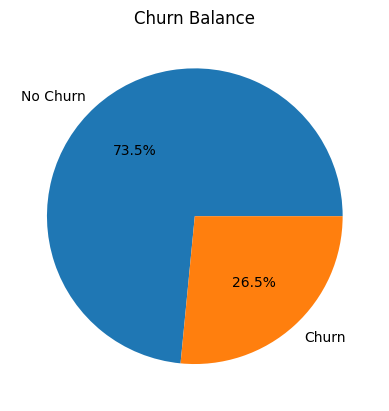

In [8]:
def plot_balance(df: pd.DataFrame):
    churn = df["Churn"].value_counts()
    plt.pie(churn, labels = ["No Churn", "Churn"], autopct='%1.1f%%')
    plt.title("Churn Balance")
    plt.show()

plot_balance(preprocess_data)

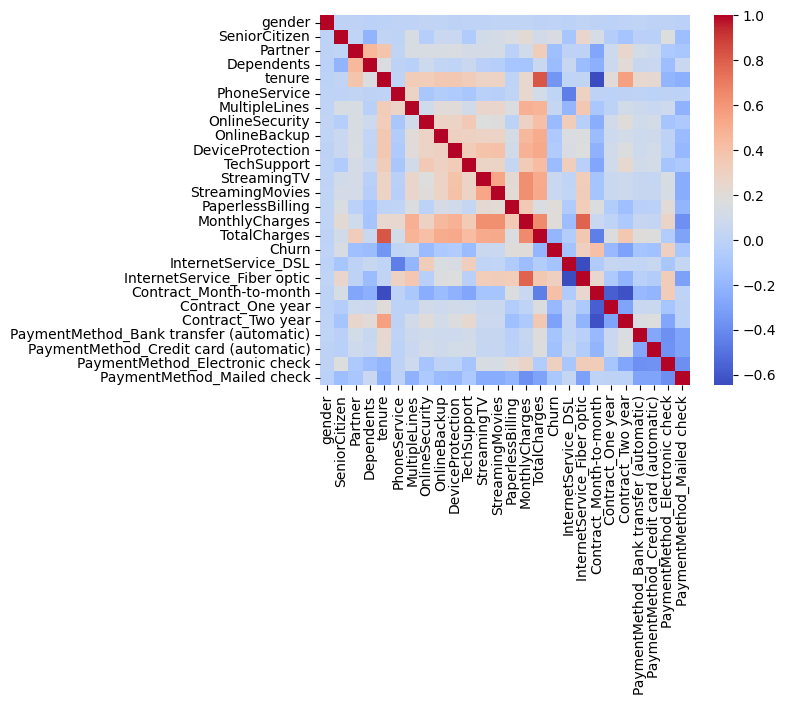

In [5]:
# Plot the correlation matrix as a heatmap
corr = preprocess_data.drop("customerID", axis=1).corr()
sns.heatmap(corr, cmap='coolwarm', annot=False, fmt='.2f', square=True, xticklabels=corr.columns, yticklabels=corr.columns)
plt.show()


## Preprocesamiento de datos

- Se separan los datos en entrenamiento y prueba.
  - El conjunto de pruebas es el último 10% de los datos
- Se escalan los datos con el predictor entrenado en el conjunto de entrenamiento
- Se duplica duplican las entradas Churn del conjunto de entrenamiento para combatir el desbalance de las etiquetas

,gender,SeniorCitizen,Partner,Dependents,tenure,PhoneService,MultipleLines,OnlineSecurity,OnlineBackup,DeviceProtection,TechSupport,StreamingTV
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.495244,0.162147,0.483033,0.299588,32.371149,0.903166,0.421837,0.286668,0.344881,0.343888,0.290217,0.384353
std,0.500013,0.368612,0.499748,0.458110,24.559481,0.295752,0.493888,0.452237,0.475363,0.475038,0.453895,0.486477
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,0.000000,0.000000,9.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,0.000000,0.000000,0.000000,29.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,0.000000,1.000000,1.000000,55.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000
max,1.000000,1.000000,1.000000,1.000000,72.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


,StreamingMovies,PaperlessBilling,MonthlyCharges,TotalCharges,Churn,InternetService_DSL,InternetService_Fiber optic,Contract_Month-to-month,Contract_One year,Contract_Two year,PaymentMethod_Bank transfer (automatic),PaymentMethod_Credit card (automatic),PaymentMethod_Electronic check,PaymentMethod_Mailed check
count,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000,7043.000000
mean,0.387903,0.592219,64.761692,2283.300441,0.265370,0.343746,0.439585,0.550192,0.209144,0.240664,0.219225,0.216101,0.335794,0.228880
std,0.487307,0.491457,30.090047,2265.000258,0.441561,0.474991,0.496372,0.497510,0.406726,0.427517,0.413751,0.411613,0.472301,0.420141
min,0.000000,0.000000,18.250000,18.800000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.000000,35.500000,402.225000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,0.000000,1.000000,70.350000,1400.550000,0.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,89.850000,3786.600000,1.000000,1.000000,1.000000,1.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000
max,1.000000,1.000000,118.750000,8684.800000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


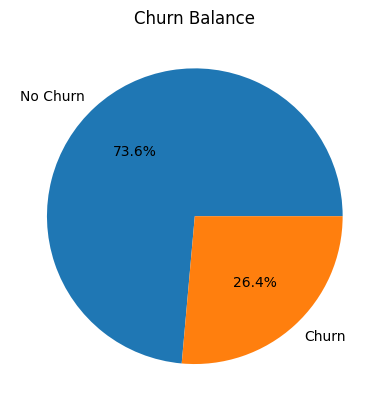

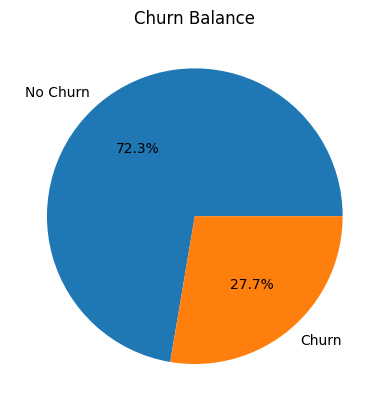

In [20]:
display(preprocess_data[preprocess_data.columns[:len(preprocess_data.columns)//2]].describe())
display(preprocess_data[preprocess_data.columns[len(preprocess_data.columns)//2:]].describe())

train_percentage = 0.1
X_len = len(preprocess_data)
train_threshold = int(X_len*(1 - train_percentage))
X_train, X_test = preprocess_data[:train_threshold], preprocess_data[train_threshold:]

# X_train = pd.concat([X_train, X_train[X_train["Churn"] == 1]], ignore_index=True)

plot_balance(X_train)
plot_balance(X_test)

In [21]:
from sklearn.preprocessing import MinMaxScaler

to_scale = ["tenure", "MonthlyCharges", "TotalCharges"]
scaler = MinMaxScaler()
scaler.fit(X_train[to_scale])
X_train[to_scale] = scaler.transform(X_train[to_scale])
X_test[to_scale] = scaler.transform(X_test[to_scale])

display(X_train[to_scale].describe())

drop_columns = ["Churn", "customerID"]
column_names = list(X_train.drop(drop_columns, axis=1))

X_train, y_train = X_train.drop(drop_columns, axis=1).to_numpy(), X_train["Churn"].to_numpy()
X_test, y_test = X_test.drop(drop_columns, axis=1).to_numpy(), X_test["Churn"].to_numpy()

/tmp/ipykernel_11082/2567989102.py:6: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_train[to_scale] = scaler.transform(X_train[to_scale])
/tmp/ipykernel_11082/2567989102.py:7: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X_test[to_scale] = scaler.transform(X_test[to_scale])


,tenure,MonthlyCharges,TotalCharges
count,6338.000000,6338.000000,6338.000000
mean,0.449059,0.462249,0.260872
std,0.341456,0.300045,0.261714
min,0.000000,0.000000,0.000000
25%,0.125000,0.167910,0.043929
50%,0.402778,0.518905,0.159200
75%,0.763889,0.712438,0.433124
max,1.000000,1.000000,1.000000


In [22]:
from sklearn.svm import SVC
from sklearn.ensemble import AdaBoostClassifier, RandomForestClassifier, GradientBoostingClassifier
from sklearn.naive_bayes import GaussianNB
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.neighbors import KNeighborsClassifier

from sklearn.feature_selection import RFECV

from sklearn.model_selection import StratifiedKFold

def feature_extraction(model, x, y, column_names, verbose=True):
    min_features_to_select = 3
    metric = "accuracy"

    rfecv = RFECV(
        estimator=model,
        step=1,
        cv=StratifiedKFold(5, shuffle=True, random_state=1234),
        scoring=metric,
        min_features_to_select=min_features_to_select,
        n_jobs=2,
    )
    rfecv.fit(x, y)

    if verbose:

        print("Selected Features:")
        selected = 0
        selected_indexes = []
        for i, (name, value) in enumerate(zip(column_names, rfecv.support_)):
            if value:
                print(name, ":", "Selected")
                selected += 1
                selected_indexes.append(i)
            else:
                print(name, ":", "Not selected")

        print("Selected", selected, "of", len(column_names), "features")

        try:
            n_scores = len(rfecv.cv_results_["mean_test_score"])
            plt.figure()
            plt.xlabel("Number of features selected")
            plt.ylabel(f"Mean test {metric}")
            plt.errorbar(
                range(min_features_to_select, n_scores + min_features_to_select),
                rfecv.cv_results_["mean_test_score"],
                yerr=rfecv.cv_results_["std_test_score"],
            )
            plt.title("Recursive Feature Elimination \nwith correlated features")
            plt.show()
        except:
            pass
        return rfecv, selected_indexes

    return rfecv

all_selected_features = []

for cls in [LogisticRegression(),
            DecisionTreeClassifier(),
            RandomForestClassifier(),
            AdaBoostClassifier(),
            GradientBoostingClassifier()]:
    _, selected_features_indexes = feature_extraction(cls, X_train, y_train, column_names)
    all_selected_features.extend(selected_features_indexes)


Selected Features:
gender : Not selected
SeniorCitizen : Selected
Partner : Not selected
Dependents : Selected
tenure : Selected
PhoneService : Selected
MultipleLines : Selected
OnlineSecurity : Selected
OnlineBackup : Selected
DeviceProtection : Not selected
TechSupport : Selected
StreamingTV : Selected
StreamingMovies : Selected
PaperlessBilling : Selected
MonthlyCharges : Selected
TotalCharges : Selected
InternetService_DSL : Selected
InternetService_Fiber optic : Selected
Contract_Month-to-month : Selected
Contract_One year : Not selected
Contract_Two year : Selected
PaymentMethod_Bank transfer (automatic) : Not selected
PaymentMethod_Credit card (automatic) : Selected
PaymentMethod_Electronic check : Selected
PaymentMethod_Mailed check : Selected
Selected 20 of 25 features
Selected Features:
gender : Selected
SeniorCitizen : Selected
Partner : Selected
Dependents : Selected
tenure : Selected
PhoneService : Not selected
MultipleLines : Selected
OnlineSecurity : Not selected
OnlineB

In [23]:
features = pd.DataFrame({"Selected": all_selected_features})
print(features.value_counts())
feature_ranking = list(x[0] for x in features.value_counts().index)
features_indexes = feature_ranking[:18] # Stays with features selected by at least 3 classifiers

new_X_train = X_train[:,features_indexes]
new_X_test = X_test[:,features_indexes]

Selected
18          5
11          5
23          5
17          5
4           5
15          5
6           5
14          5
13          5
1           5
10          5
12          4
8           4
7           4
5           3
20          3
3           3
22          3
19          2
0           2
16          2
9           2
2           2
21          1
24          1
Name: count, dtype: int64


## Selección de modelos

In [24]:
from sklearn.ensemble import VotingClassifier

def build_train_and_predict_model(model:SVC, x_train, y_train, x_test, **model_args):
    model = model(**model_args)
    model.fit(x_train, y_train)
    return model, model.predict(x_test)

predictors = [
    ("AdaBoostClassifier", AdaBoostClassifier, {}),
    ("RandomForestClassifier", RandomForestClassifier, {}),
    ("GradientBoostingClassifier", GradientBoostingClassifier, {}),
    ("GaussianNB", GaussianNB, {}),
    ("LogisticRegression", LogisticRegression, {}),
    ("DecisionTreeClassifier", DecisionTreeClassifier, {}),
    ("MLPClassifier", MLPClassifier, {}),
    ("KNeighborsClassifier", KNeighborsClassifier, {}),
]

predictors.append(("VotingClassifier", VotingClassifier, {"estimators": [(name, model(**args)) for name, model, args in predictors]}))
predictors.reverse()
predictions = []

for name, classifier, args in predictors:
    print(name)
    model, prediction = build_train_and_predict_model(classifier, new_X_train, y_train, new_X_test, **args)
    predictions.append((name, model, prediction))

VotingClassifier


/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(
/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)


KNeighborsClassifier
MLPClassifier


/usr/local/lib/python3.8/dist-packages/sklearn/neighbors/_classification.py:211: FutureWarning: Unlike other reduction functions (e.g. `skew`, `kurtosis`), the default behavior of `mode` typically preserves the axis it acts along. In SciPy 1.11.0, this behavior will change: the default value of `keepdims` will become False, the `axis` over which the statistic is taken will be eliminated, and the value None will no longer be accepted. Set `keepdims` to True or False to avoid this warning.
  mode, _ = stats.mode(_y[neigh_ind, k], axis=1)
/usr/local/lib/python3.8/dist-packages/sklearn/neural_network/_multilayer_perceptron.py:614: ConvergenceWarning: Stochastic Optimizer: Maximum iterations (200) reached and the optimization hasn't converged yet.
  warnings.warn(


DecisionTreeClassifier
LogisticRegression
GaussianNB
GradientBoostingClassifier
RandomForestClassifier
AdaBoostClassifier


In [26]:
import autosklearn.classification
from pprint import pprint

automl = autosklearn.classification.AutoSklearnClassifier(
    tmp_folder="/model/autosklearnmodel",
    n_jobs=2,
)
automl.fit(X_train, y_train, dataset_name="Churn")

print(automl.leaderboard())
pprint(automl.show_models(), indent=4)

ask_prediction = automl.predict(X_test)
predictions.append(("Auto Sklearn", automl, ask_prediction))

[WARNING] [2023-07-29 20:01:24,923:Client-AutoMLSMBO(1)::Churn] Dataset churn already in meta-data. Removing occurence.
          rank  ensemble_weight           type      cost  duration
model_id                                                          
367          1             0.02     libsvm_svc  0.189771  3.927743
425          2             0.02     libsvm_svc  0.190727  3.939165
378          3             0.02  liblinear_svc  0.194551  0.734747
145          4             0.52            sgd  0.195507  0.691626
255          5             0.42            sgd  0.195507  0.544928
{   145: {   'balancing': Balancing(random_state=1),
             'classifier': <autosklearn.pipeline.components.classification.ClassifierChoice object at 0x7f39db920ac0>,
             'cost': 0.1955066921606119,
             'data_preprocessor': <autosklearn.pipeline.components.data_preprocessing.DataPreprocessorChoice object at 0x7f39fbcf0580>,
             'ensemble_weight': 0.52,
             'feature_pr

## Evaluación de modelos

El modelo con mayor `accuracy` es el ensamblado encontrado por auto sklearn, con 0.81, el peor modelo es GaussianNB con 0.73 de `accuracy`. 

VotingClassifier

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       510
           1       0.69      0.51      0.58       195

    accuracy                           0.80       705
   macro avg       0.76      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



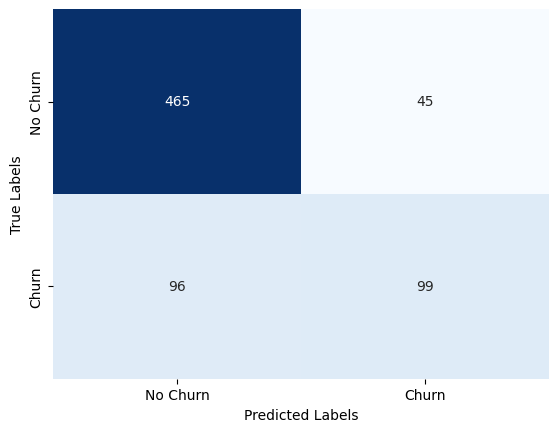


KNeighborsClassifier

              precision    recall  f1-score   support

           0       0.82      0.88      0.85       510
           1       0.60      0.49      0.54       195

    accuracy                           0.77       705
   macro avg       0.71      0.68      0.69       705
weighted avg       0.76      0.77      0.76       705



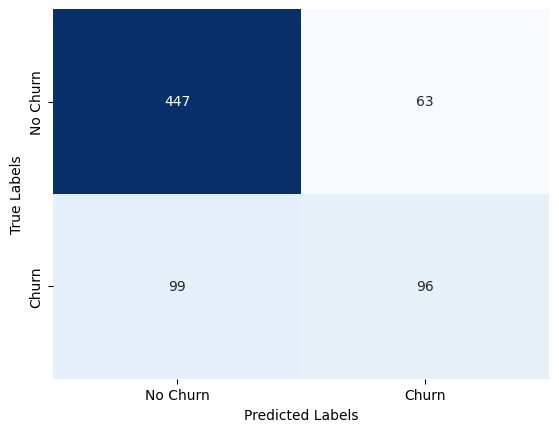


MLPClassifier

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       510
           1       0.69      0.50      0.58       195

    accuracy                           0.80       705
   macro avg       0.76      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



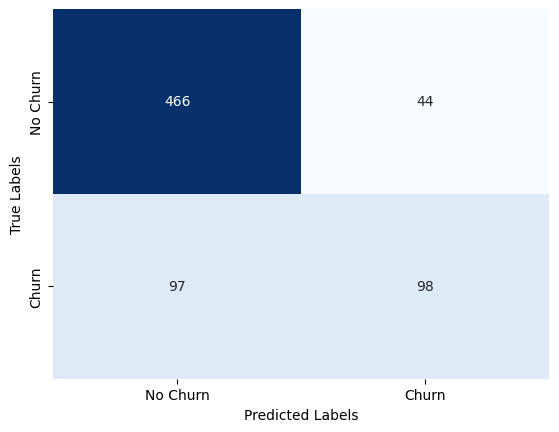


DecisionTreeClassifier

              precision    recall  f1-score   support

           0       0.81      0.85      0.82       510
           1       0.54      0.47      0.50       195

    accuracy                           0.74       705
   macro avg       0.67      0.66      0.66       705
weighted avg       0.73      0.74      0.73       705



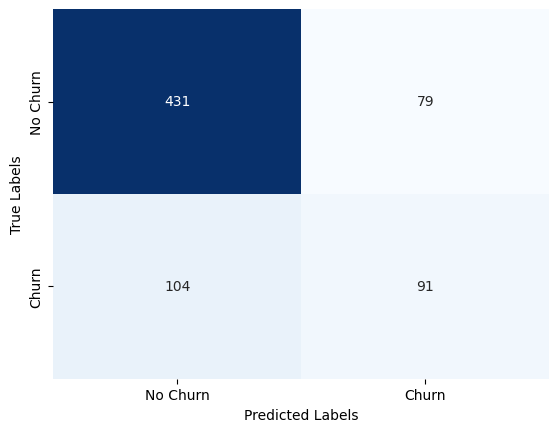


LogisticRegression

              precision    recall  f1-score   support

           0       0.83      0.90      0.87       510
           1       0.67      0.52      0.59       195

    accuracy                           0.80       705
   macro avg       0.75      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



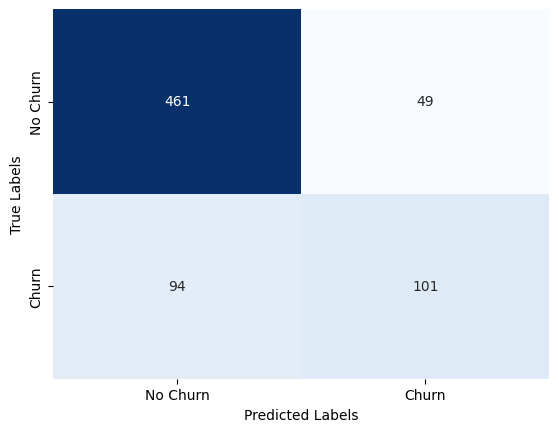


GaussianNB

              precision    recall  f1-score   support

           0       0.88      0.73      0.80       510
           1       0.51      0.75      0.61       195

    accuracy                           0.73       705
   macro avg       0.70      0.74      0.70       705
weighted avg       0.78      0.73      0.75       705



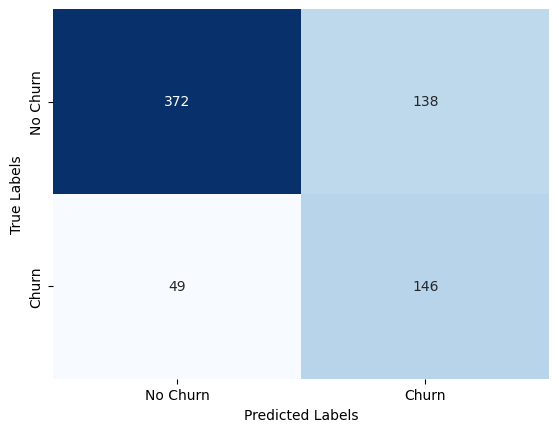


GradientBoostingClassifier

              precision    recall  f1-score   support

           0       0.83      0.92      0.87       510
           1       0.70      0.51      0.59       195

    accuracy                           0.80       705
   macro avg       0.76      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



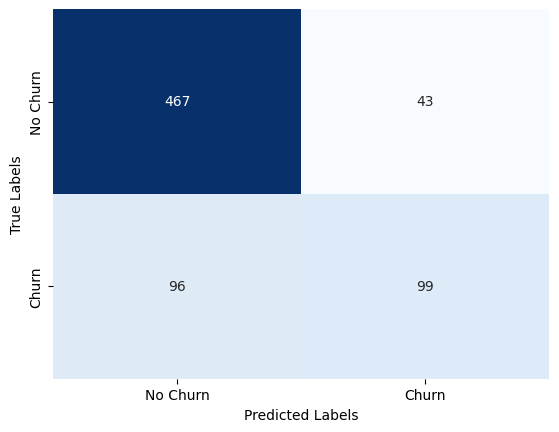


RandomForestClassifier

              precision    recall  f1-score   support

           0       0.83      0.90      0.86       510
           1       0.67      0.51      0.58       195

    accuracy                           0.79       705
   macro avg       0.75      0.71      0.72       705
weighted avg       0.78      0.79      0.78       705



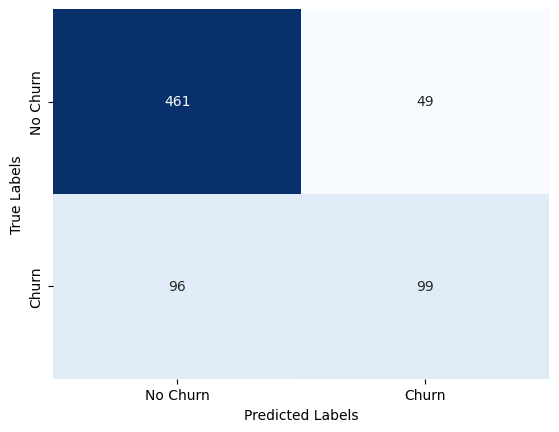


AdaBoostClassifier

              precision    recall  f1-score   support

           0       0.83      0.91      0.87       510
           1       0.69      0.52      0.59       195

    accuracy                           0.80       705
   macro avg       0.76      0.71      0.73       705
weighted avg       0.79      0.80      0.79       705



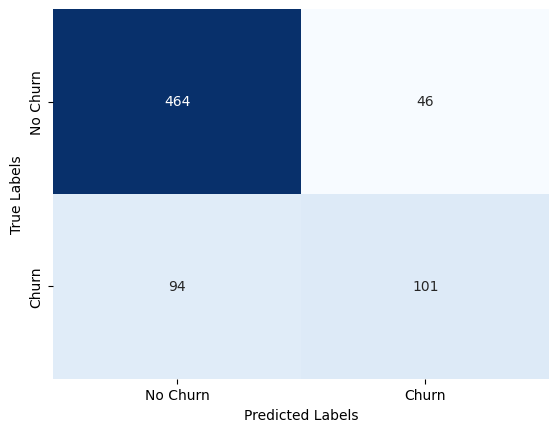


Auto Sklearn

              precision    recall  f1-score   support

           0       0.83      0.93      0.87       510
           1       0.72      0.49      0.58       195

    accuracy                           0.81       705
   macro avg       0.77      0.71      0.73       705
weighted avg       0.80      0.81      0.79       705



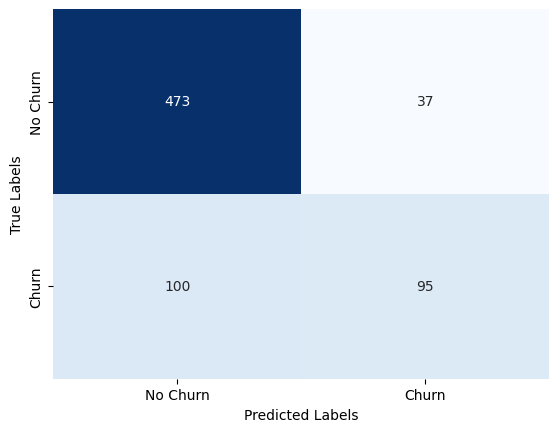

In [27]:
from sklearn.metrics import classification_report, roc_curve, confusion_matrix, roc_auc_score
def evaluate_predictions(y_predict, y_true, class_names, header, y_predict_probabilities=None):
    print(header)
    print()
    print(classification_report(y_true, y_predict))
    cm = confusion_matrix(y_true, y_predict)
    sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', cbar=False, xticklabels=class_names, yticklabels=class_names)
    plt.xlabel('Predicted Labels')
    plt.ylabel('True Labels')
    plt.show()
    if y_predict_probabilities:
        roc_auc = roc_auc_score(y_true, y_predict_probabilities)
        print("AUC-ROC:", roc_auc)
        fpr, tpr, _ = roc_curve(y_true, y_predict_probabilities)
        plt.figure(figsize=(8, 6))
        plt.plot(fpr, tpr, color='blue', lw=2, label=f'ROC curve (AUC = {roc_auc:.2f})')
        plt.plot([0, 1], [0, 1], color='gray', linestyle='--')
        plt.xlim([0.0, 1.0])
        plt.ylim([0.0, 1.05])
        plt.xlabel('False Positive Rate')
        plt.ylabel('True Positive Rate')
        plt.title(f'{header} Receiver Operating Characteristic (ROC) Curve')
        plt.legend(loc='lower right')
        plt.show()
    print()

for name, model, prediction in predictions:
    evaluate_predictions(prediction, y_test, ["No Churn", "Churn"], name)
